# 1. Importar bibliotecas e carregar dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# carregar o dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/one /Regressão Linear/usina.csv")

# visualizar colunas
print(df.columns)
df.head()


Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# 2. Separar variáveis explicativas (X) e alvo (y = PE)

In [2]:
X = df.drop(columns=["PE"])  # explicativas = AT, V, AP, RH
y = df["PE"]

# dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 3. Verificar multicolinearidade (VIF)

In [3]:
explicativas = X_train.columns

vif = pd.DataFrame()
vif["variavel"] = explicativas
vif["vif"] = [variance_inflation_factor(X_train[explicativas].values, i)
              for i in range(len(explicativas))]

print(vif)


  variavel        vif
0       AT  39.384317
1        V  74.976590
2       AP  66.462842
3       RH  40.802274


Interpretação:

VIF próximo de 1 → sem multicolinearidade.

VIF maior que 10 → multicolinearidade forte (avaliar retirar a variável ou usar PCA).

# 4. Construir modelo de regressão linear

In [4]:
# adiciona constante
X_train_const = sm.add_constant(X_train)

# cria modelo
modelo = sm.OLS(y_train, X_train_const).fit()

# resumo do modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.477e+04
Date:                Sat, 16 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:50:58   Log-Likelihood:                -22492.
No. Observations:                7654   AIC:                         4.499e+04
Df Residuals:                    7649   BIC:                         4.503e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.5691     10.901     41.700      0.0

# 5. Análise de resíduos (homocedasticidade)

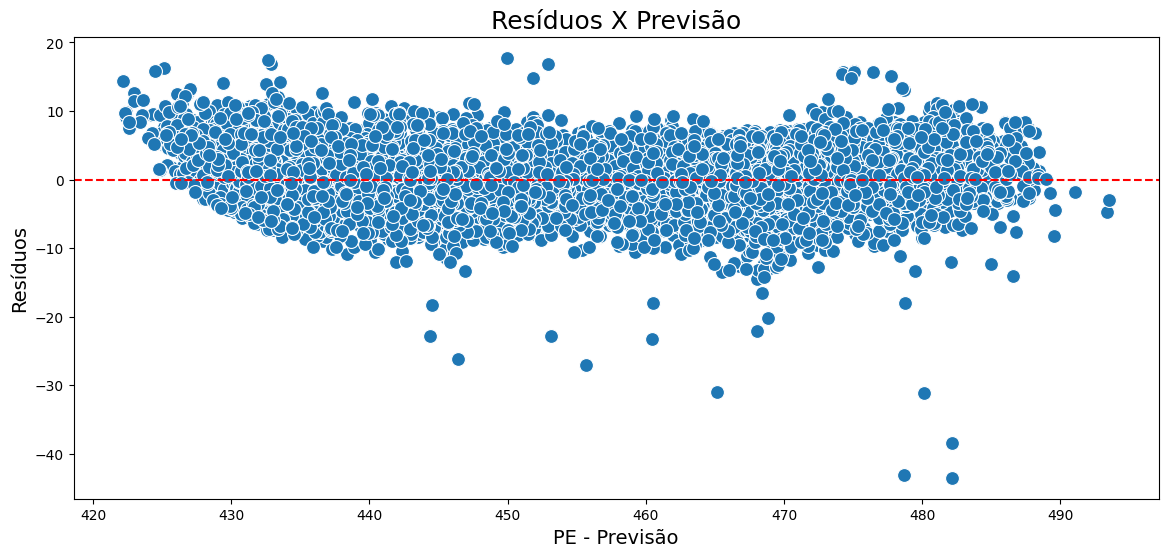

In [5]:
# previsões no treino
y_previsto_train = modelo.predict(X_train_const)

# resíduos
residuos = modelo.resid

# gráfico Resíduos vs Previsão
ax = sns.scatterplot(x=y_previsto_train, y=residuos, s=100)
ax.figure.set_size_inches(14, 6)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('PE - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
plt.axhline(0, color='red', linestyle='--')
plt.show()


Aleatório em torno de 0 → homocedasticidade (bom sinal).

Formato de funil ou padrão → heterocedasticidade (problema de variância dos erros).